In [ ]:
#this nb is intented to run pca, keeping the most relevant features, 
#scale each data point according to the variation as before before merging and turning into 
#sequence data
import numpy as np
import random
seq_length = 30
val_perc = 0.1
test_perc = 0.5
data = np.load("/Users/carlos/Documents/Peccala/deepL_tests/few_series/np_series_concat2.npy")
def prepare_data(data):
    X_total = []
    for j in range(data.shape[0]):  
        xdata = data[j, -1500:,:] #take only the last 1500 measurements
        X_data = xdata[:, :-1]

        # Check for NaNs
        if np.isnan(X_data).any().any():
            print(f"Something wrong at {j}")
            continue
        X_total.append(X_data)
    X_total = np.concatenate(X_total, axis=0)  
    return X_total
    
def shuffle_data(X_data):
    ''' Shuffles x_data,
    '''   
    indices = [a for a in range(X_data.shape[0])]
    random.shuffle(indices)
    return X_data[indices]
x_total = prepare_data(data)   
print(x_total.shape)

Something wrong at 12
(30000, 145)


Text(0, 0.5, 'cumulative explained variance')

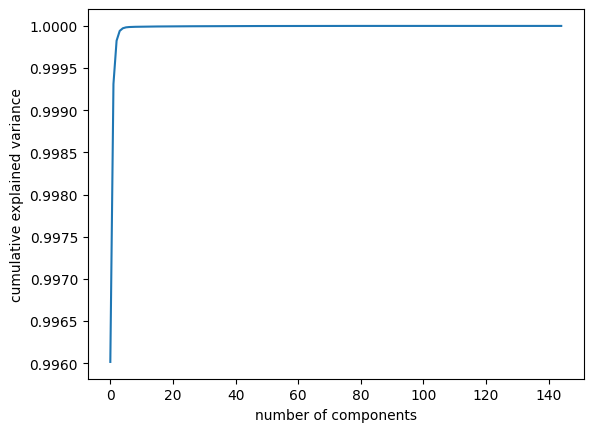

In [22]:
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt

x_total = shuffle_data(x_total)
pca = PCA()
X_pca = pca.fit(x_total)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [56]:
pca = PCA(n_components = 0.999999)
X_pca = pca.fit_transform(x_total) # this will fit and reduce dimensions
print(pca.n_components_)

52


In [57]:
n_pcs= pca.n_components_ 
cols = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
len(set(cols))

42

In [60]:
arr=list(set(cols))
print(arr[:23])
print(arr[23:])

[0, 1, 3, 5, 13, 15, 144, 16, 17, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 34, 36, 38, 39]
[40, 41, 46, 48, 49, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 67, 68, 71]
